<a href="https://colab.research.google.com/github/ibritics/Python_DataAnalytics_Tutorials/blob/main/Python_Files/Lecture08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 8: Polynomials and Lags

## Libraries

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

Mounted at /content/drive


## Polynomial

## y=f()
Initially our function is <br>
 **f()= 4+2*X** <br>
See Introduction to Statistical Learning p.

In [ ]:
X= np.random.rand(100,1)*100 #Creating a line

In [ ]:
y= 4+2*X

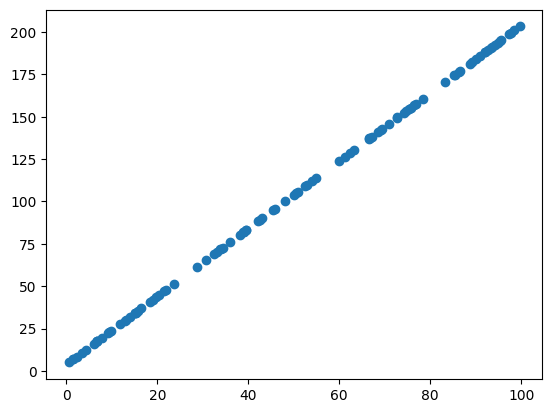

In [ ]:
plt.scatter(X,y)
plt.plot()
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()
pred= model.predict(X)

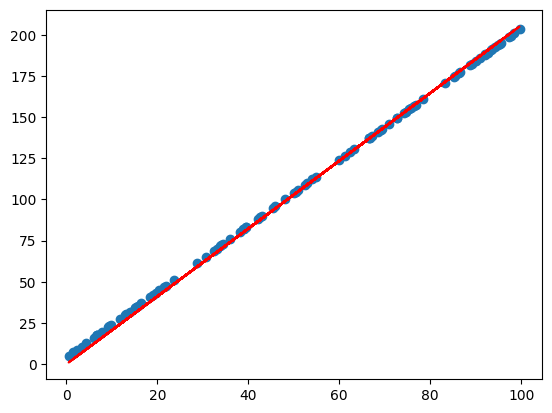

In [ ]:
plt.scatter(X,y)
plt.plot(X,pred,color='red')
plt.show()

### Adding some noise
 **f()= 4+2*X+e**

In [ ]:
y= 4+2*X+np.random.rand(100,1)*100

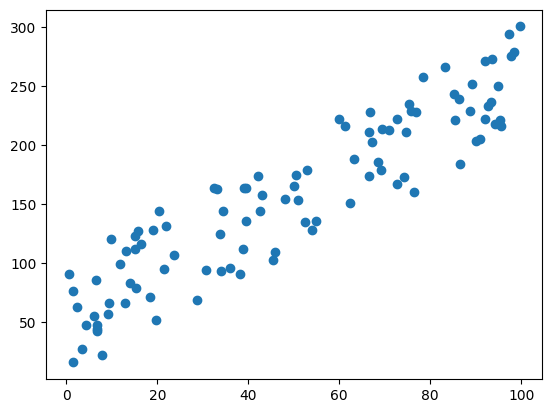

In [ ]:
plt.scatter(X,y)
plt.plot()
plt.show()

In [ ]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()
pred= model.predict(X)

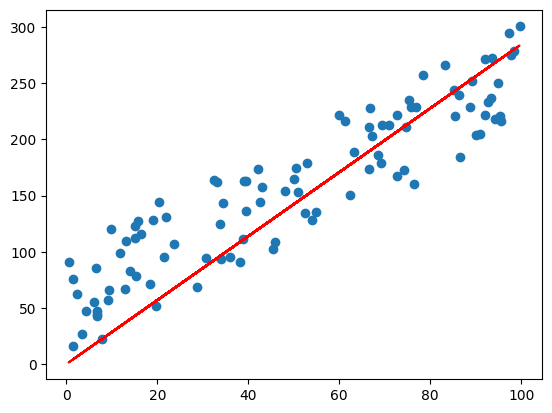

In [ ]:
plt.scatter(X,y)
plt.plot(X,pred,color='red')
plt.show()

### By adding a 2nd degree x
 **f()= 4+2*x+x^2+e**

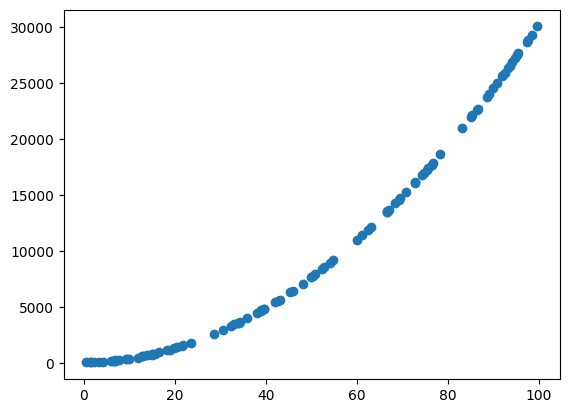

In [ ]:
y= 4+2*X+3*X**2+np.random.rand(100,1)*100
plt.scatter(X,y)
plt.plot()
plt.show()

In [ ]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()
pred= model.predict(X)

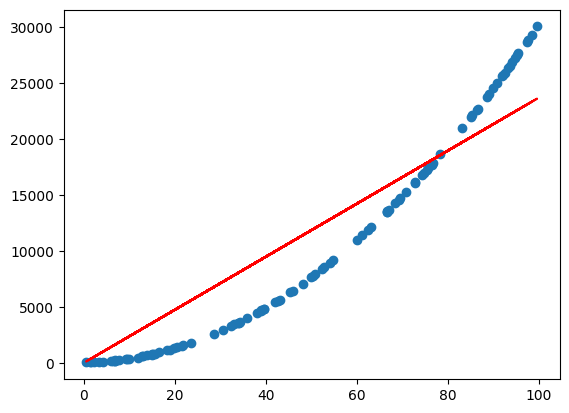

In [ ]:
plt.scatter(X,y)
plt.plot(X,pred,color='red')
plt.show()

Therefore we need to use polynomial model. We don't use specific Polynomial model we add the features to our X

In [ ]:
X_poly= pd.DataFrame({'X':[i[0] for i in X]}) #Don't get scared it's just values of X in square brackets

In [ ]:
X_poly

,X
0,83.211223
1,66.614437
2,13.115855
3,59.942177
4,12.809841
...,...
95,39.550665
96,6.486138
97,69.211885
98,15.040756


In [ ]:
X_poly['X2']=X**2

In [ ]:
X_poly

,X,X2
0,83.211223,6924.107580
1,66.614437,4437.483155
2,13.115855,172.025652
3,59.942177,3593.064611
4,12.809841,164.092022
...,...,...
95,39.550665,1564.255082
96,6.486138,42.069989
97,69.211885,4790.285019
98,15.040756,226.224354


In [ ]:
# Fit the linear regression model
model = sm.OLS(y, X_poly).fit()
pred= model.predict(X_poly)

In [ ]:
pred

0     20999.640805
1     13515.730594
2       569.621408
3     10969.820101
4       544.646770
          ...     
95     4834.082705
96      153.517670
97    14578.598676
98      739.517924
99     3266.870795
Length: 100, dtype: float64

In [ ]:
sort_order = np.argsort(X_poly['X']) #We are just sorting the values nothing special
X_sorted = X_poly.iloc[sort_order]
pred_sorted = model.predict(X_sorted)

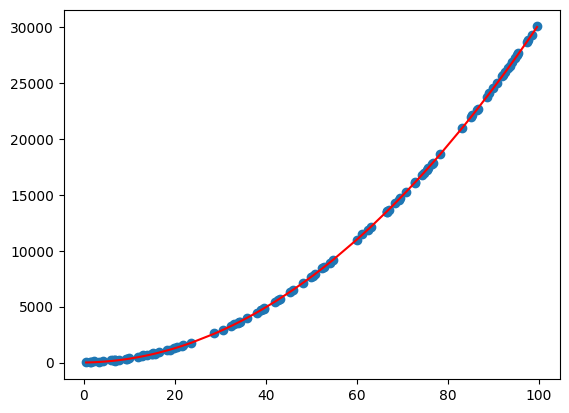

In [ ]:
# X_values = np.linspace(X_poly['X'].min(), X_poly['X'].max(), 100).reshape(-1, 1)
# X_values_poly = sm.add_constant(X_values)
# y_values = model.predict(X_values_poly)
plt.scatter(X, y)
plt.plot(X_sorted['X'], pred_sorted, color='red', label='Polynomial Regression')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
X_poly_2= poly_features.fit_transform(X)

In [ ]:
X[0]

array([83.21122268])

In [ ]:
X_poly_2[0]

array([  83.21122268, 6924.10758005])

In [ ]:
X_poly.head(1)

,X,X2
0,83.211223,6924.10758


In [ ]:
X_poly_2 = pd.DataFrame(X_poly_2, columns=['X','X2'])

In [ ]:
# Fit the linear regression model
model = sm.OLS(y, X_poly_2).fit()
pred_poly= model.predict(X_poly_2)

In [ ]:
sort_order = np.argsort(X_poly_2['X']) #We are just sorting the values nothing special
X_sorted = X_poly_2.iloc[sort_order]
pred_sorted = model.predict(X_sorted)

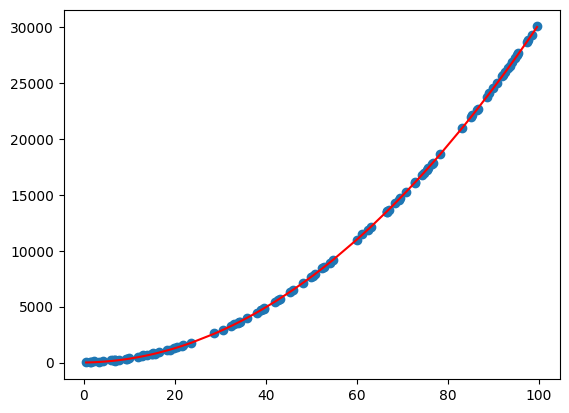

In [ ]:
# X_values = np.linspace(X_poly['X'].min(), X_poly['X'].max(), 100).reshape(-1, 1)
# X_values_poly = sm.add_constant(X_values)
# y_values = model.predict(X_values_poly)
plt.scatter(X, y)
plt.plot(X_sorted['X'], pred_sorted, color='red', label='Polynomial Regression')
plt.show()

## Concept of LAG

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Preply/Mariia/Data/Smarket.csv', index_col=0 )

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df.columns

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction'], dtype='object')

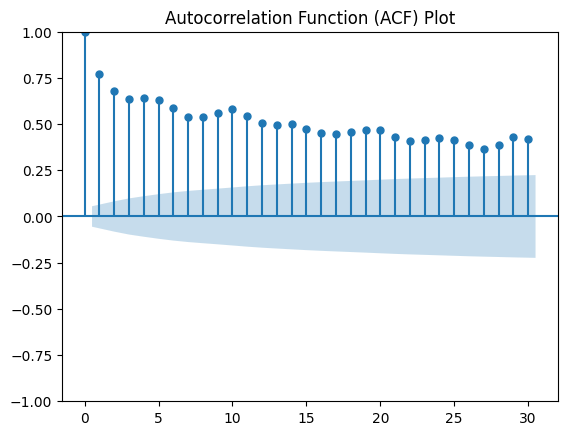

In [ ]:
sm.graphics.tsa.plot_acf(df.Volume, lags=30)  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [ ]:
print(df.Volume, df.Volume.shift(1))

Year
2001    1.19130
2001    1.29650
2001    1.41120
2001    1.27600
2001    1.20570
         ...   
2005    1.88850
2005    1.28581
2005    1.54047
2005    1.42236
2005    1.38254
Name: Volume, Length: 1250, dtype: float64 Year
2001        NaN
2001    1.19130
2001    1.29650
2001    1.41120
2001    1.27600
         ...   
2005    2.06517
2005    1.88850
2005    1.28581
2005    1.54047
2005    1.42236
Name: Volume, Length: 1250, dtype: float64
